# Librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Importación de Datos

In [2]:
path = ("C:/Users/Usuario/Documents/walter docs/Freelance/Customer Segmentation/Data_pago_score.csv")
datos = pd.read_csv(path, sep=",")
datos

,Clientes,counts,DiasPago_max,DiasPago_min,ImporteMedio_h,DiasCalle_h,DiasPago_h,Importe_year,DiasCalle_year,year_dummy_comp,...,Score_comp,DiasPago,year_dummy_pago,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago
0,1,19,0,0,13570.411765,18.941176,0.000000,149565,111,1,...,1,0.0,1.0,7.0,0.0,0.0,0.0,0.0,7.0,1.0
1,2,74,0,0,2920.645833,14.750000,0.000000,140191,708,0,...,1,0.0,0.0,74.0,0.0,0.0,0.0,0.0,74.0,1.0
2,3,22,38,0,1181.100000,16.400000,3.300000,11811,164,0,...,2,82.0,0.0,19.0,2.0,1.0,0.0,0.0,22.0,2.0
3,4,35,0,0,1639.241379,1.655172,0.000000,47538,48,0,...,1,0.0,0.0,35.0,0.0,0.0,0.0,0.0,35.0,1.0
4,5,1,0,0,982.000000,2.000000,0.000000,982,2,0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,10070,251,989,0,13527.888000,39.720000,15.920000,1690986,4965,0,...,5,9800.0,0.0,188.0,16.0,10.0,20.0,17.0,251.0,5.0
2429,100067,1,0,0,428581.000000,19.000000,0.000000,428581,19,1,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2430,100748,120,44,0,6004.662338,24.207792,5.051948,207738,105,1,...,2,63.0,1.0,20.0,3.0,0.0,0.0,0.0,23.0,2.0
2431,100749,8,25,0,1788.200000,23.400000,12.600000,8941,117,0,...,2,89.0,0.0,4.0,4.0,0.0,0.0,0.0,8.0,2.0


# Analisis Exploratorio

In [3]:
clientes = datos.copy()
datos = datos.drop("Clientes", axis = 1)
datos["year_dummy_comp"] = datos["year_dummy_comp"].astype("str") 
datos["year_dummy_pago"] = datos["year_dummy_pago"].astype("str") 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   counts           2433 non-null   int64  
 1   DiasPago_max     2433 non-null   int64  
 2   DiasPago_min     2433 non-null   int64  
 3   ImporteMedio_h   2433 non-null   float64
 4   DiasCalle_h      2433 non-null   float64
 5   DiasPago_h       2433 non-null   float64
 6   Importe_year     2433 non-null   int64  
 7   DiasCalle_year   2433 non-null   int64  
 8   year_dummy_comp  2433 non-null   object 
 9   Total_dias       2433 non-null   int64  
 10  Score_comp       2433 non-null   int64  
 11  DiasPago         2433 non-null   float64
 12  year_dummy_pago  2433 non-null   object 
 13  menos_15_y       2433 non-null   float64
 14  menos_30_y       2433 non-null   float64
 15  menos_45_y       2433 non-null   float64
 16  menos_75_y       2433 non-null   float64
 17  mas_75_y      

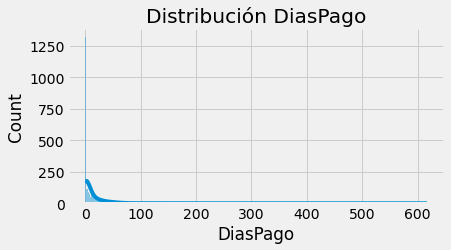

In [4]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='DiasPago_h', kde=True,ax=ax)
ax.set_title("Distribución DiasPago")
ax.set_xlabel('DiasPago');

IndexError: index 9 is out of bounds for axis 0 with size 9

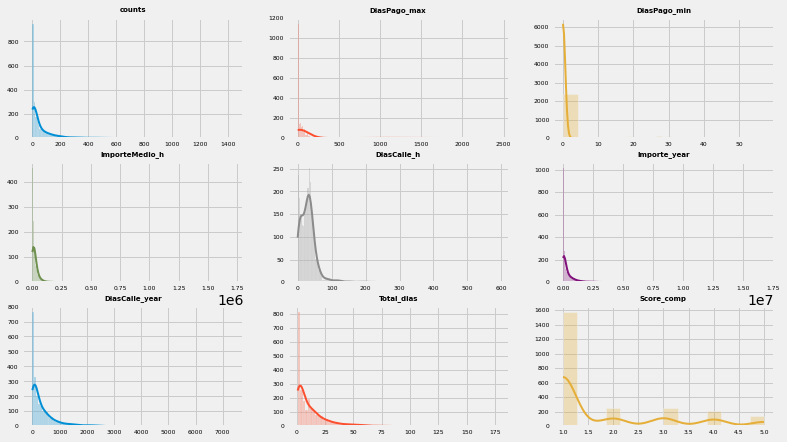

In [5]:
# Gráfico de distribución para cada algunas variables numéricas
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('DiasPago_h')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [6]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,year_dummy_comp,year_dummy_pago
count,2433,2433
unique,2,2
top,1,1.0
freq,1698,1698


# División en train y test

In [7]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('DiasPago_h', axis = 'columns'),
                                        datos['DiasPago_h'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [8]:
# Analizando paritición
# ==============================================================================
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count    1946.000000
mean       11.749792
std        33.206069
min         0.000000
25%         0.000000
50%         0.843216
75%        12.271252
max       617.000000
Name: DiasPago_h, dtype: float64

,counts,DiasPago_max,DiasPago_min,ImporteMedio_h,DiasCalle_h,Importe_year,DiasCalle_year,Total_dias,Score_comp,DiasPago,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago
count,1946.000000,1946.000000,1946.000000,1.946000e+03,1946.000000,1.946000e+03,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,60.687050,168.318088,0.321686,2.855683e+04,32.516515,4.033624e+05,395.461973,13.023638,1.787770,549.717883,18.057040,1.681912,1.165468,1.250771,0.808325,22.963515,1.905961
std,107.794497,457.767450,2.975878,8.279745e+04,34.605061,8.473466e+05,585.980180,16.546467,1.240977,3090.029054,25.870179,4.730370,4.355578,6.338345,4.739676,32.405960,1.376219
min,1.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.000000,0.000000,4.235758e+03,12.818912,2.135200e+04,44.000000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.250000,1.000000
50%,18.000000,18.000000,0.000000,1.210658e+04,30.000000,1.008780e+05,177.500000,7.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
75%,68.000000,67.000000,0.000000,2.627233e+04,40.832627,4.413268e+05,510.750000,17.000000,2.000000,122.000000,22.000000,1.000000,1.000000,0.000000,0.000000,31.000000,2.000000
max,1440.000000,2440.000000,51.000000,1.717006e+06,592.000000,1.670598e+07,7391.000000,178.000000,5.000000,71237.000000,269.000000,71.000000,88.000000,159.000000,154.000000,448.000000,5.000000


,year_dummy_comp,year_dummy_pago
count,1946,1946
unique,2,2
top,1,1.0
freq,1356,1356


 
Partición de test
-----------------------


count    487.000000
mean      13.090991
std       34.538257
min        0.000000
25%        0.000000
50%        1.121951
75%       14.362500
max      448.500000
Name: DiasPago_h, dtype: float64

,counts,DiasPago_max,DiasPago_min,ImporteMedio_h,DiasCalle_h,Importe_year,DiasCalle_year,Total_dias,Score_comp,DiasPago,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago
count,487.000000,487.000000,487.000000,487.000000,487.000000,4.870000e+02,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,63.624230,203.034908,0.509240,26549.396642,31.840797,4.245002e+05,412.675565,13.728953,1.889117,884.184805,19.240246,1.802875,1.236140,1.663244,1.053388,24.995893,2.030801
std,101.500068,522.120373,4.034243,59004.320922,39.655888,7.074343e+05,635.271704,16.828487,1.327156,4896.209962,27.482987,4.041726,3.416206,8.031672,3.899090,33.112664,1.475826
min,1.000000,0.000000,0.000000,67.000000,0.000000,1.340000e+02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.000000,0.000000,4962.661111,13.848485,2.328050e+04,49.500000,3.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,23.000000,21.000000,0.000000,13570.411765,28.000000,1.449610e+05,190.000000,7.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000
75%,82.000000,80.500000,0.000000,29973.166667,38.312500,5.533285e+05,516.500000,18.000000,3.000000,162.000000,25.000000,1.000000,1.000000,0.000000,0.000000,34.000000,3.000000
max,894.000000,2421.000000,57.000000,833919.666667,517.000000,6.527245e+06,5661.000000,125.000000,5.000000,58351.000000,192.000000,26.000000,37.000000,143.000000,30.000000,221.000000,5.000000


,year_dummy_comp,year_dummy_pago
count,487,487
unique,2,2
top,1,1.0
freq,342,342


# Preprocesado

Los modelos de redes neuronales requieren como mínimo de dos tipos de preprocesado: binarización (One hot ecoding) de las variables categóricas y estandarización de las variables continuas.

In [9]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [10]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['counts', 'DiasPago_max', 'DiasPago_min',
                                  'ImporteMedio_h', 'DiasCalle_h',
                                  'Importe_year', 'DiasCalle_year',
                                  'Total_dias', 'Score_comp', 'DiasPago',
                                  'menos_15_y', 'menos_30_y', 'menos_45_y',
                                  'menos_75_y', 'mas_75_y', 'Total',
                                  'Score_pago']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['year_dummy_comp', 'year_dummy_pago'])])

In [11]:
set_config(display='text')

In [12]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [13]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns = labels)
datos_train_prep.info()
datos_train_prep

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   counts               1946 non-null   float64
 1   DiasPago_max         1946 non-null   float64
 2   DiasPago_min         1946 non-null   float64
 3   ImporteMedio_h       1946 non-null   float64
 4   DiasCalle_h          1946 non-null   float64
 5   Importe_year         1946 non-null   float64
 6   DiasCalle_year       1946 non-null   float64
 7   Total_dias           1946 non-null   float64
 8   Score_comp           1946 non-null   float64
 9   DiasPago             1946 non-null   float64
 10  menos_15_y           1946 non-null   float64
 11  menos_30_y           1946 non-null   float64
 12  menos_45_y           1946 non-null   float64
 13  menos_75_y           1946 non-null   float64
 14  mas_75_y             1946 non-null   float64
 15  Total                1946 non-null   f

,counts,DiasPago_max,DiasPago_min,ImporteMedio_h,DiasCalle_h,Importe_year,DiasCalle_year,Total_dias,Score_comp,DiasPago,...,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago,year_dummy_comp_0,year_dummy_comp_1,year_dummy_pago_0.0,year_dummy_pago_1.0
0,-0.535295,-0.300051,-0.108125,-0.301296,-0.641203,-0.469335,-0.666511,-0.726846,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.677936,-0.658466,0.0,1.0,0.0,1.0
1,-0.303313,-0.171131,-0.108125,-0.242023,1.040100,-0.355419,0.728092,-0.061880,1.783110,0.017895,...,0.278715,0.191650,0.276047,0.462529,0.155458,2.248794,1.0,0.0,1.0,0.0
2,-0.321871,-0.367788,-0.108125,-0.310835,-0.544112,-0.455153,-0.652855,-0.605943,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.616203,-0.658466,0.0,1.0,0.0,1.0
3,-0.470340,-0.367788,-0.108125,-0.318015,-0.814633,-0.452431,-0.608474,-0.243235,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.400138,-0.658466,1.0,0.0,1.0,0.0
4,-0.516737,-0.367788,-0.108125,-0.338540,2.187626,-0.476151,-0.538488,-0.726846,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.677936,-0.658466,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,-0.553854,-0.367788,-0.108125,-0.276007,16.171834,-0.469412,0.335487,-0.726846,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.677936,-0.658466,1.0,0.0,1.0,0.0
1942,-0.526016,-0.367788,-0.108125,-0.130573,-0.723101,-0.392347,-0.623837,-0.545492,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.585336,-0.658466,0.0,1.0,0.0,1.0
1943,-0.553854,-0.367788,-0.108125,-0.343019,-0.939888,-0.475960,-0.675046,-0.726846,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.677936,-0.658466,1.0,0.0,1.0,0.0
1944,-0.516737,-0.319716,-0.108125,-0.135363,0.144047,-0.458464,-0.536781,-0.666394,-0.634961,-0.177946,...,-0.355647,-0.267649,-0.197385,-0.170588,-0.647069,-0.658466,0.0,1.0,0.0,1.0


# Modelado

In [14]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [15]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
31,0.001,10,215.443469,-279.807760,212.724897,-89.678815,7.980420
40,0.01,"(10, 10)",1000.0,-282.025652,218.779196,-70.610172,10.617175
22,0.001,20,1000.0,-283.665801,197.234363,-175.357963,19.846828
23,0.01,20,215.443469,-291.261992,241.190153,-80.724047,14.681049
29,0.01,20,1000.0,-293.472943,211.263165,-175.372873,19.500700
8,0.01,10,1000.0,-294.664389,200.998287,-178.812554,21.900724
12,0.001,10,1000.0,-297.959386,203.415385,-178.138551,20.270164
46,0.01,10,215.443469,-300.620841,230.855129,-85.020062,14.772298
27,0.001,20,215.443469,-302.474611,239.888544,-79.790742,12.296701
36,0.001,"(10, 10)",1000.0,-307.320978,247.686754,-76.281595,8.973090


In [16]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  19.859089434257026


In [17]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 215.44346900318823,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [18]:
data_pago = modelo_final.predict(X = datos.drop("DiasPago_h",axis = 1))
clientes["Predicción"] = data_pago

clientes 

,Clientes,counts,DiasPago_max,DiasPago_min,ImporteMedio_h,DiasCalle_h,DiasPago_h,Importe_year,DiasCalle_year,year_dummy_comp,...,DiasPago,year_dummy_pago,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total,Score_pago,Predicción
0,1,19,0,0,13570.411765,18.941176,0.000000,149565,111,1,...,0.0,1.0,7.0,0.0,0.0,0.0,0.0,7.0,1.0,0.468000
1,2,74,0,0,2920.645833,14.750000,0.000000,140191,708,0,...,0.0,0.0,74.0,0.0,0.0,0.0,0.0,74.0,1.0,-0.370727
2,3,22,38,0,1181.100000,16.400000,3.300000,11811,164,0,...,82.0,0.0,19.0,2.0,1.0,0.0,0.0,22.0,2.0,3.746915
3,4,35,0,0,1639.241379,1.655172,0.000000,47538,48,0,...,0.0,0.0,35.0,0.0,0.0,0.0,0.0,35.0,1.0,-1.993003
4,5,1,0,0,982.000000,2.000000,0.000000,982,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.382875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,10070,251,989,0,13527.888000,39.720000,15.920000,1690986,4965,0,...,9800.0,0.0,188.0,16.0,10.0,20.0,17.0,251.0,5.0,5.811571
2429,100067,1,0,0,428581.000000,19.000000,0.000000,428581,19,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.065088
2430,100748,120,44,0,6004.662338,24.207792,5.051948,207738,105,1,...,63.0,1.0,20.0,3.0,0.0,0.0,0.0,23.0,2.0,4.927681
2431,100749,8,25,0,1788.200000,23.400000,12.600000,8941,117,0,...,89.0,0.0,4.0,4.0,0.0,0.0,0.0,8.0,2.0,9.556800


In [23]:
data_pago = clientes[["Clientes", "year_dummy_comp", "Score_pago", "DiasPago_h", "Predicción", 
                     "menos_15_y","menos_30_y","menos_45_y","menos_75_y","mas_75_y","Total"]]

for c in [ "menos_15_y","menos_30_y","menos_45_y","menos_75_y","mas_75_y"]:
    data_pago[c] = data_pago[c]/data_pago["Total"]


data_pago.to_csv("data_pago_pred.csv",index=False)
data_pago

,Clientes,year_dummy_comp,Score_pago,DiasPago_h,Predicción,menos_15_y,menos_30_y,menos_45_y,menos_75_y,mas_75_y,Total
0,1,1,1.0,0.000000,0.468000,1.000000,0.000000,0.000000,0.000000,0.000000,7.0
1,2,0,1.0,0.000000,-0.370727,1.000000,0.000000,0.000000,0.000000,0.000000,74.0
2,3,0,2.0,3.300000,3.746915,0.863636,0.090909,0.045455,0.000000,0.000000,22.0
3,4,0,1.0,0.000000,-1.993003,1.000000,0.000000,0.000000,0.000000,0.000000,35.0
4,5,0,1.0,0.000000,1.382875,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2428,10070,0,5.0,15.920000,5.811571,0.749004,0.063745,0.039841,0.079681,0.067729,251.0
2429,100067,1,1.0,0.000000,1.065088,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
2430,100748,1,2.0,5.051948,4.927681,0.869565,0.130435,0.000000,0.000000,0.000000,23.0
2431,100749,0,2.0,12.600000,9.556800,0.500000,0.500000,0.000000,0.000000,0.000000,8.0
